In [1]:
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models # type: ignore
import matplotlib.pyplot as plt
import os

In [2]:
def extract_mfccs(file_path, max_pad_len=174):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)
    mfccs = np.pad(mfccs, ((0, 0), (0, max_pad_len - mfccs.shape[1])), 'constant')
    return mfccs

In [3]:
def load_data_mfcc(dataset_path):
    mfccs_list = []
    labels = []
    
    for fold in os.listdir(dataset_path):
        fold_path = os.path.join(dataset_path, fold)
        if os.path.isdir(fold_path):
            for file_name in os.listdir(fold_path):
                if file_name.endswith('.wav'):
                    file_path = os.path.join(fold_path, file_name)
                    mfccs = extract_mfccs(file_path)
                    label = int(file_name.split('-')[1])
                    mfccs_list.append(mfccs)
                    labels.append(label)
    
    return np.array(mfccs_list), np.array(labels)

In [4]:
dataset_path = 'UrbanSound8K'
mfccs, labels = load_data_mfcc(dataset_path)
X_mfcc_train, X_mfcc_test, y_train, y_test = train_test_split(
    mfccs, labels, test_size=0.2, random_state=42)

/Users/sivaprasanth/.pyenv/versions/3.10.12/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
/Users/sivaprasanth/.pyenv/versions/3.10.12/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/Users/sivaprasanth/.pyenv/versions/3.10.12/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(


In [5]:
input_shape_mfcc = X_mfcc_train[0].shape
model_mfcc = models.Sequential([
    layers.Input(shape=input_shape_mfcc),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [6]:
model_mfcc.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
history_mfcc = model_mfcc.fit(X_mfcc_train, y_train, epochs=10, validation_data=(X_mfcc_test, y_test))

Epoch 1/10
219/219 [==============================] - 2s 5ms/step - loss: 6.5161 - accuracy: 0.1652 - val_loss: 2.1390 - val_accuracy: 0.2112
Epoch 2/10
219/219 [==============================] - 1s 4ms/step - loss: 2.1665 - accuracy: 0.2056 - val_loss: 2.0269 - val_accuracy: 0.2284
Epoch 3/10
219/219 [==============================] - 1s 4ms/step - loss: 2.0273 - accuracy: 0.2369 - val_loss: 1.9593 - val_accuracy: 0.2719
Epoch 4/10
219/219 [==============================] - 1s 4ms/step - loss: 1.9668 - accuracy: 0.2593 - val_loss: 1.8918 - val_accuracy: 0.2891
Epoch 5/10
219/219 [==============================] - 1s 4ms/step - loss: 1.9296 - accuracy: 0.2683 - val_loss: 1.8886 - val_accuracy: 0.2873
Epoch 6/10
219/219 [==============================] - 1s 4ms/step - loss: 1.8780 - accuracy: 0.2842 - val_loss: 1.8497 - val_accuracy: 0.2914
Epoch 7/10
219/219 [==============================] - 1s 4ms/step - loss: 1.8458 - accuracy: 0.2880 - val_loss: 1.8069 - val_accuracy: 0.3137
Epoch 

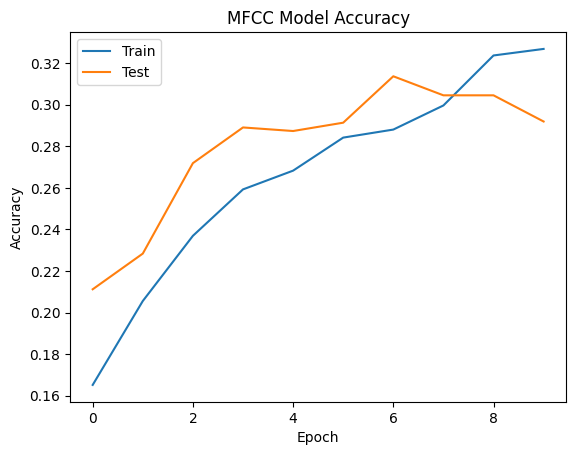

In [8]:
plt.plot(history_mfcc.history['accuracy'])
plt.plot(history_mfcc.history['val_accuracy'])
plt.title('MFCC Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()